In [10]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Load data from CSV in file.
dataRaw = pd.read_csv('TrueData/Drug1_1000nM_DesignResults.csv')

In [12]:
# Parse data to create tensor containing all data in format:
# [Cell, Time, NascentRNA, NuclearRNA, CytoplasmicRNA, Protein, Vitality]
k = 0

Reps = np.unique(dataRaw['Rep_Num'])
FOVs = np.unique(dataRaw['FOV_Num'])
Times = np.unique(dataRaw['Time'])
Cells = np.unique(dataRaw['Cell_id'])

print('Total Reps: ', len(Reps))
print('Total FOVs: ', len(FOVs))
print('Total cells: ', len(Cells))
print('Time points: ', len(Times))

dataTensor = np.zeros((len(Cells), len(Times), 5))

for iCell in range(len(Cells)):
    for iTime in range(len(Times)):
        if dataRaw['is_cell_vital'][k]==1:
            dataTensor[iCell, iTime, 0] = dataRaw['num_rna_nascent'][k]
            dataTensor[iCell, iTime, 1] = dataRaw['num_rna_nuc'][k]
            dataTensor[iCell, iTime, 2] = dataRaw['num_rna_cyto'][k]
            dataTensor[iCell, iTime, 3] = dataRaw['Cyto_Intensity_1'][k]
            dataTensor[iCell, iTime, 4] = 1
        else:
            dataTensor[iCell, iTime, 0] = np.nan
            dataTensor[iCell, iTime, 1] = np.nan
            dataTensor[iCell, iTime, 2] = np.nan
            dataTensor[iCell, iTime, 3] = np.nan
            dataTensor[iCell, iTime, 4] = 0
        k += 1

Total Reps:  2
Total FOVs:  6
Total cells:  124
Time points:  21


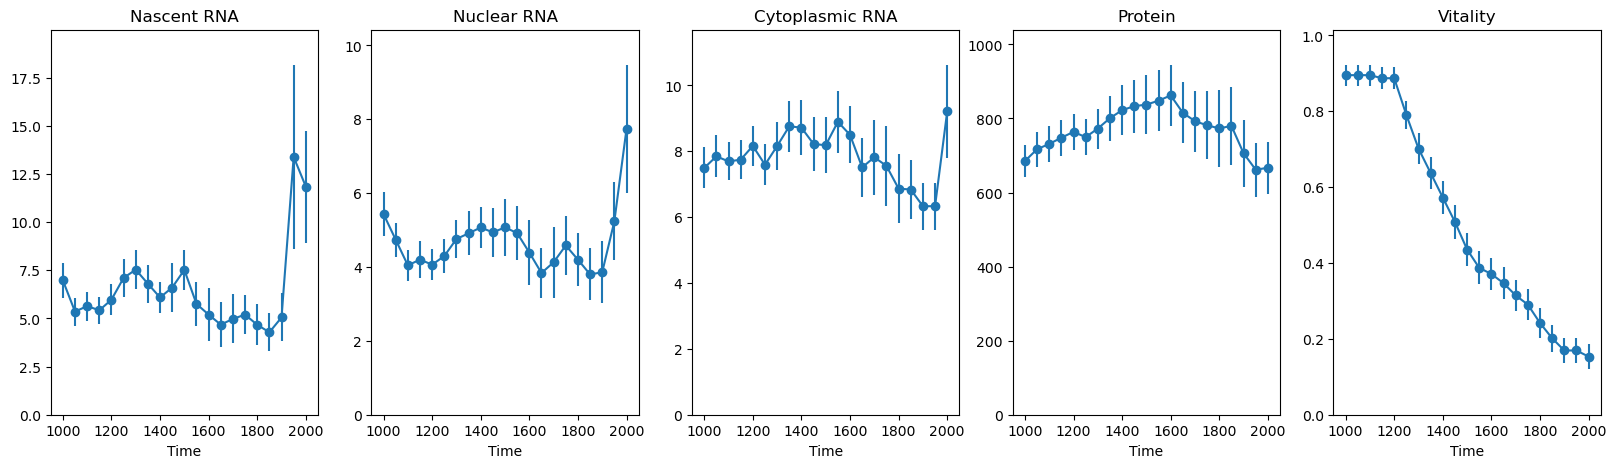

In [13]:
# Calculate mean and SEM of each data type at each time point. Ignore NaN values.
dataMean = np.nanmean(dataTensor, axis=0)
dataStd = np.nanstd(dataTensor, axis=0) / np.sqrt(np.sum(~np.isnan(dataTensor), axis=0))

featureNames = ['Nascent RNA', 'Nuclear RNA', 'Cytoplasmic RNA', 'Protein', 'Vitality']

# Plot data
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    ax[i].errorbar(Times, dataMean[:, i], yerr=dataStd[:, i], fmt='-o')
    ax[i].set_title(featureNames[i])
    ax[i].set_xlabel('Time')
    ax[i].set_ylim([0, 1.1 * np.nanmax(dataMean[:, i] + dataStd[:, i])])
